--------------------------------------------Toxic Tweet Detection Using NLP----------------------------------------------

Importing Necessary Libraries

In [2]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

Converting the Dataset into Pandas DataFrame and Cleaning the Data 

In [3]:
df = pd.read_csv('tweet_dataset.csv')
df=df.drop(["Unnamed: 0"],axis="columns")
df.drop_duplicates(inplace=True)
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Removing Stop Words,Puntuation in Tweets and applying Lemmatization 

In [4]:
#Using Spacy for NLP
nlp=spacy.load("en_core_web_sm") #Using Small English Model 
#Function for Text Preoprocessing
def text_preprocess(text):
    processed_tweet=[]
    data=nlp(text)
    for token in data:
        if token.is_stop or token.is_punct:
            continue
        elif token.text.startswith('@'):
            continue
        else:
           processed_tweet.append(token.lemma_) 
    return " ".join(processed_tweet)
   
# A new column "processed_tweet" added into dataframe,which contains Processed Tweets.
df["processed_tweet"]=df["tweet"].apply(lambda x:text_preprocess(x)) 

Sepearating Features and Labels

In [5]:
X=df["processed_tweet"]
y=df["Toxicity"]
df.head()

,Toxicity,tweet,processed_tweet
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use cause offer wheelchair v...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u u time urð± ðððð ...
4,0,factsguide: society now #motivation,factsguide society motivation


Splitting the Datasets for Training and Testing

In [6]:
X_train, X_test, y_train, y_test   =  train_test_split(X, y, test_size=0.2, random_state=42)

Text Representation

In [7]:
#Count Vectorizer for Bag of Words
count_vectorizer  = CountVectorizer()
X_train_cv        = count_vectorizer.fit_transform(X_train)
X_test_cv         = count_vectorizer.transform(X_test)
#TF-IDF Vectorizer
tfidf_vectorizer  = TfidfVectorizer()
X_train_tfidf     = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf      = tfidf_vectorizer.transform(X_test)

Function for Machine Learning Model and Evaluation Metrics

In [8]:
def model_and_em(model, X_train, y_train, X_test, y_test,vect):
    #Fitting the data  with Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Evaluation Metrics
    accuracy      =        accuracy_score(y_test, y_pred)
    precision     =        precision_score(y_test, y_pred)
    recall        =        recall_score(y_test, y_pred)
    f1            =        f1_score(y_test, y_pred)
    conf_matrix   =        confusion_matrix(y_test, y_pred)
    
    #ROC_AUC curve
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr,tpr, color='red', lw=2, label=f"AUC: {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve of model using {vect}')
    plt.show()
    return accuracy, precision, recall, f1, conf_matrix, roc_auc



-----------------------------------------------Decision Tree---------------------------------------------------------


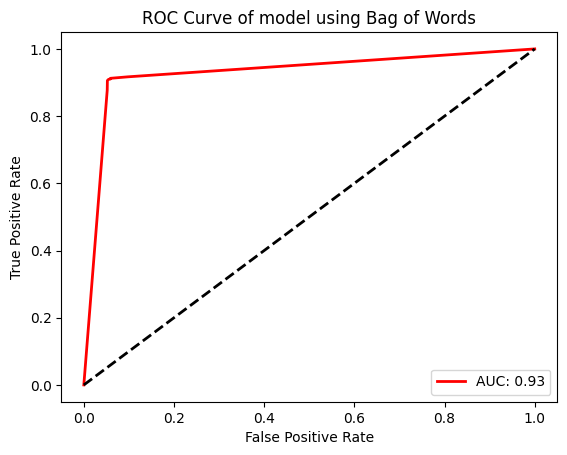

Bag of Words-------------
 Accuracy: 0.929
Precision: 0.930
Recall: 0.909
F1-Score: 0.919
Confusion Matrix:
 [[5717  332]
 [ 436 4378]]
ROC_AUC Score: 0.929



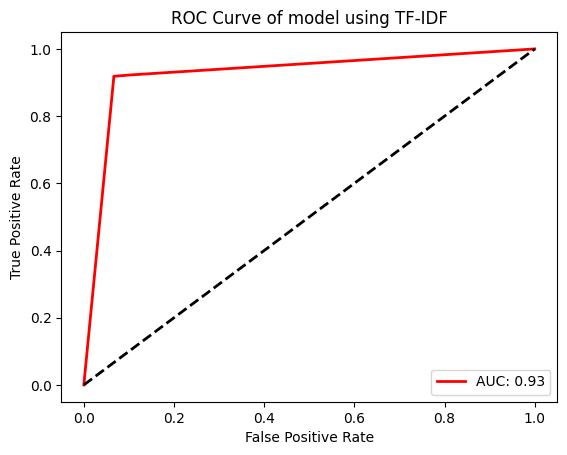

TF-IDF-------------------
 Accuracy: 0.929
Precision: 0.930
Recall: 0.909
F1-Score: 0.918
Confusion Matrix:
 [[5647  402]
 [ 393 4421]]
ROC_AUC Score: 0.926

-----------------------------------------------Random Forest---------------------------------------------------------


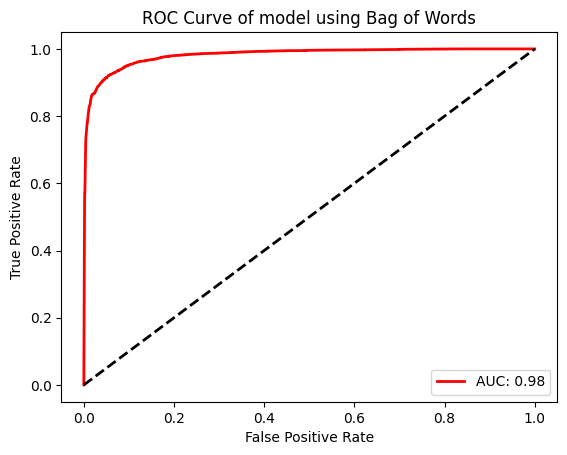

Bag of Words-------------
 Accuracy: 0.934
Precision: 0.930
Recall: 0.921
F1-Score: 0.925
Confusion Matrix:
 [[5713  336]
 [ 379 4435]]
ROC_AUC Score: 0.982



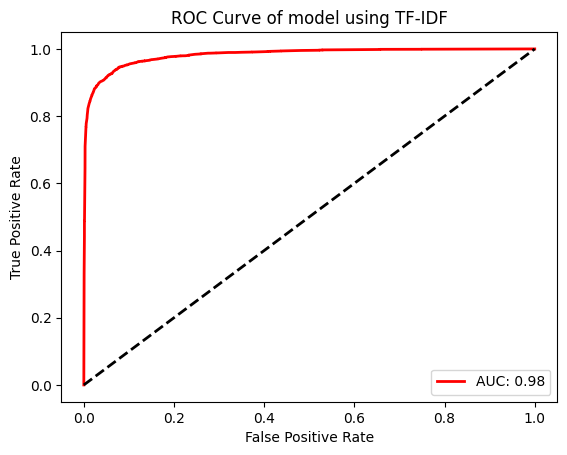

TF-IDF-------------------
 Accuracy: 0.934
Precision: 0.930
Recall: 0.921
F1-Score: 0.926
Confusion Matrix:
 [[5707  342]
 [ 368 4446]]
ROC_AUC Score: 0.982

-----------------------------------------------Naive Bayes---------------------------------------------------------


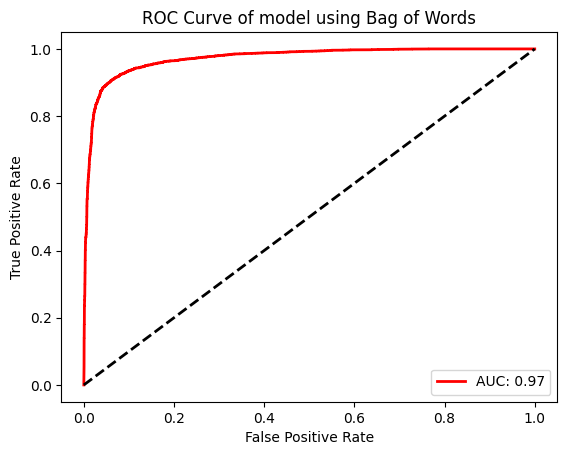

Bag of Words-------------
 Accuracy: 0.913
Precision: 0.874
Recall: 0.939
F1-Score: 0.905
Confusion Matrix:
 [[5400  649]
 [ 295 4519]]
ROC_AUC Score: 0.972



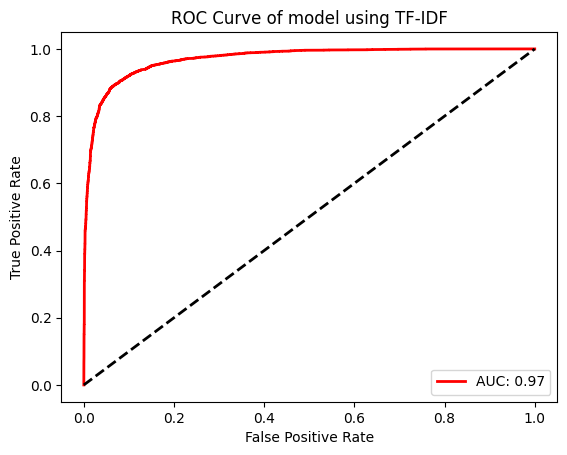

TF-IDF-------------------
 Accuracy: 0.913
Precision: 0.874
Recall: 0.939
F1-Score: 0.900
Confusion Matrix:
 [[5452  597]
 [ 389 4425]]
ROC_AUC Score: 0.970

-----------------------------------------------KNN---------------------------------------------------------


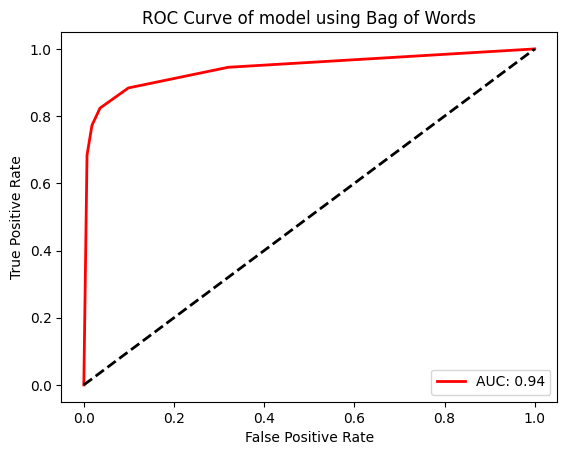

Bag of Words-------------
 Accuracy: 0.902
Precision: 0.948
Recall: 0.824
F1-Score: 0.882
Confusion Matrix:
 [[5832  217]
 [ 848 3966]]
ROC_AUC Score: 0.942



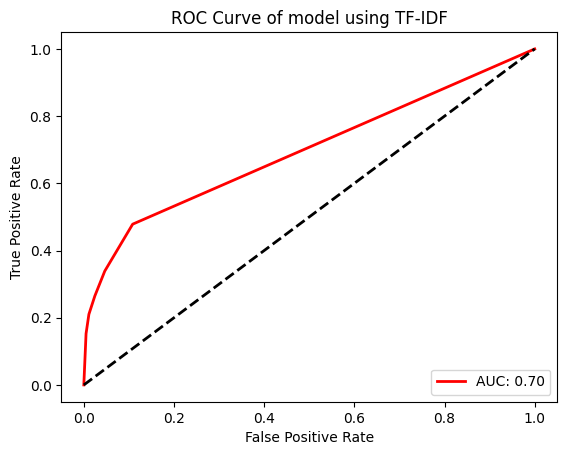

TF-IDF-------------------
 Accuracy: 0.902
Precision: 0.948
Recall: 0.824
F1-Score: 0.409
Confusion Matrix:
 [[5901  148]
 [3539 1275]]
ROC_AUC Score: 0.696

-----------------------------------------------SVM---------------------------------------------------------


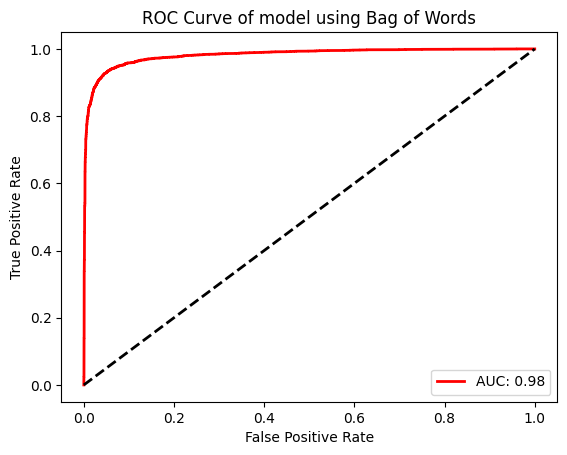

Bag of Words-------------
 Accuracy: 0.939
Precision: 0.959
Recall: 0.901
F1-Score: 0.929
Confusion Matrix:
 [[5864  185]
 [ 475 4339]]
ROC_AUC Score: 0.981



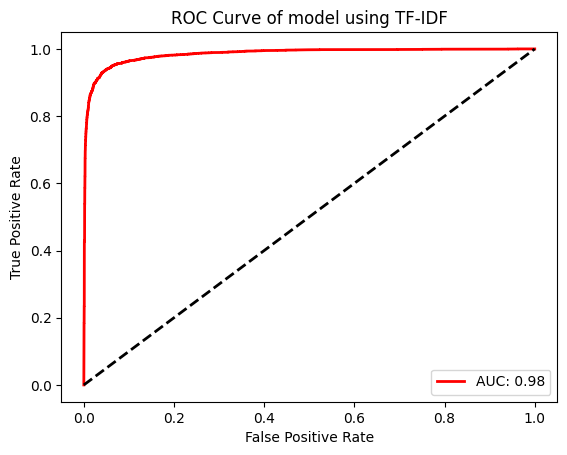

TF-IDF-------------------
 Accuracy: 0.939
Precision: 0.959
Recall: 0.901
F1-Score: 0.933
Confusion Matrix:
 [[5881  168]
 [ 458 4356]]
ROC_AUC Score: 0.985



In [9]:
# Assigning models
dt_classifier     =  DecisionTreeClassifier(random_state=42)
rf_classifier     =  RandomForestClassifier(random_state=42)
nb_classifier     =  MultinomialNB()
knn_classifier    =  KNeighborsClassifier()
svm_classifier    =  SVC(probability=True, random_state=42)

#Creating a dictionary of Models 
models = {
            'Decision Tree': dt_classifier,
            'Random Forest': rf_classifier,
            'Naive Bayes'  : nb_classifier,
            'KNN'          : knn_classifier,
            'SVM'          : svm_classifier
         }
#Executing the Model
for name, model in models.items():
    print(f"-----------------------------------------------{name}---------------------------------------------------------")

    # Bag of Words
    accuracy, precision, recall, f1, conf_matrix, roc_auc = model_and_em(model, X_train_cv, y_train, X_test_cv, y_test,"Bag of Words")
    print("Bag of Words-------------")
    print(f" Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1-Score: {f1:.3f}")
    print("Confusion Matrix:\n",conf_matrix)
    print(f"ROC_AUC Score: {roc_auc:.3f}\n")

    # TF-IDF
    acc, prec, rec, f1, conf_matrix, roc_auc = model_and_em(model, X_train_tfidf, y_train, X_test_tfidf, y_test,"TF-IDF")
    print("TF-IDF-------------------")
    print(f" Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1-Score: {f1:.3f}")
    print("Confusion Matrix:\n",  conf_matrix)
    print(f"ROC_AUC Score: {roc_auc:.3f}\n")

